In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
jr = pd.read_csv('data/gmonpro_20221207_090716_Sim1_44011.csv', header=None)

In [4]:
jr.head(3)

,0
0,PLMN;SYSTEM;XCI;xNBID;LOCAL_CID;LAC/TAC;PCI/PS...
1,44011;4;71726856;280183;8;211;251;1575;1800 B3...
2,44011;4;71726856;280183;8;211;251;1575;1800 B3...


In [5]:
jr = jr[0].str.split(';', expand=True)
jr.columns = jr.iloc[0]
jr.drop(0, inplace=True)
jr.reset_index(drop=True, inplace=True)

In [6]:
jr.rename(columns={'PCI/PSC/BSIC':'PCI', 'RSRP/RSCP':'RSRP', 'RSRQ/ECIO':'RSRQ', 'SNR':'SINR', 'LAT':'LAT_org', 'LON':'LON_org', 'TIME':'TIME_org'}, inplace=True)
jr.insert(0, 'LON', jr['LON_org'])
jr.insert(0, 'LAT', jr['LAT_org'])
jr.insert(0, 'TIME', jr['TIME_org'])
jr.drop(['LON_org', 'LAT_org', 'TIME_org'], axis=1, inplace=True)

In [7]:
jr.head(3)

,TIME,LAT,LON,PLMN,SYSTEM,XCI,xNBID,LOCAL_CID,LAC/TAC,PCI,ARFCN,BAND,RSSI,RSRP,RSRQ,SINR,CQI,TA,DISTANCE,DELTA_AZI,SPEED,GPS_ACCURACY,UL,DL,BANDWIDTH,BANDWIDTHS,CA,NR_STATE,NARFCN,NR_BAND,NR_PCI,NR_SS_RSRP,NR_SS_RSRQ,NR_SS_SINR,NR_CSI_RSRP,NR_CSI_RSRQ,NR_CSI_SINR,CLF_LABEL,CLF_LOC,CLF_DESC,DATE,ROAMING
0,09:07:16,35.698181,139.773952,44011,4,71726856,280183,8,211,251,1575,1800 B3,-65,-92,-6,1.0,,,,,0,25,22,120,5000,5,1,none,,,,,,,,,,--,--,Cell not found in the clf database!,2022/12/07,HOME
1,09:07:17,35.698181,139.773952,44011,4,71726856,280183,8,211,251,1575,1800 B3,-65,-92,-6,1.0,,56,,,0,25,11,9,5000,5,1,none,,,,,,,,,,--,--,Cell not found in the clf database!,2022/12/07,HOME
2,09:07:18,35.698181,139.773952,44011,4,71726856,280183,8,211,251,1575,1800 B3,-65,-92,-6,1.0,,56,,,0,25,69,27,5000,5,1,none,,,,,,,,,,--,--,Cell not found in the clf database!,2022/12/07,HOME


In [8]:
jr.insert(0, 'STATION', None)

In [9]:
'''09:07:46 아키하바라 출발
09:08:24 오차노미즈 도착
09:10:15 오차노미즈 출발
09:11:15 스이도바시 도착
09:12:31 스이도바시 출발
09:13:15 이이다바시 도착''';

In [10]:
print(jr.loc[jr['TIME']=='09:07:46'].index.values)
print(jr.loc[jr['TIME']=='09:08:24'].index.values)
print(jr.loc[jr['TIME']=='09:10:15'].index.values)
print(jr.loc[jr['TIME']=='09:11:15'].index.values)
print(jr.loc[jr['TIME']=='09:12:31'].index.values)
print(jr.loc[jr['TIME']=='09:13:15'].index.values)

[30]
[68]
[179]
[239]
[315]
[359]


In [11]:
jr.loc[0:30,'STATION'] = '01. Akihabara'
jr.loc[31:68,'STATION'] = '02. Akihabara-Ochanomizu'
jr.loc[69:179,'STATION'] = '03. Ochanomizu'
jr.loc[180:239,'STATION'] = '04. Ochanomizu-Suidobashi'
jr.loc[240:315,'STATION'] = '05. Suidobashi'
jr.loc[316:359,'STATION'] = '06. Suidobashi-Iidabashi'
jr.loc[360:,'STATION'] = '07. Iidabashi'

In [12]:
jr.head(3)

,STATION,TIME,LAT,LON,PLMN,SYSTEM,XCI,xNBID,LOCAL_CID,LAC/TAC,PCI,ARFCN,BAND,RSSI,RSRP,RSRQ,SINR,CQI,TA,DISTANCE,DELTA_AZI,SPEED,GPS_ACCURACY,UL,DL,BANDWIDTH,BANDWIDTHS,CA,NR_STATE,NARFCN,NR_BAND,NR_PCI,NR_SS_RSRP,NR_SS_RSRQ,NR_SS_SINR,NR_CSI_RSRP,NR_CSI_RSRQ,NR_CSI_SINR,CLF_LABEL,CLF_LOC,CLF_DESC,DATE,ROAMING
0,01. Akihabara,09:07:16,35.698181,139.773952,44011,4,71726856,280183,8,211,251,1575,1800 B3,-65,-92,-6,1.0,,,,,0,25,22,120,5000,5,1,none,,,,,,,,,,--,--,Cell not found in the clf database!,2022/12/07,HOME
1,01. Akihabara,09:07:17,35.698181,139.773952,44011,4,71726856,280183,8,211,251,1575,1800 B3,-65,-92,-6,1.0,,56,,,0,25,11,9,5000,5,1,none,,,,,,,,,,--,--,Cell not found in the clf database!,2022/12/07,HOME
2,01. Akihabara,09:07:18,35.698181,139.773952,44011,4,71726856,280183,8,211,251,1575,1800 B3,-65,-92,-6,1.0,,56,,,0,25,69,27,5000,5,1,none,,,,,,,,,,--,--,Cell not found in the clf database!,2022/12/07,HOME


In [13]:
jr.tail(3)

,STATION,TIME,LAT,LON,PLMN,SYSTEM,XCI,xNBID,LOCAL_CID,LAC/TAC,PCI,ARFCN,BAND,RSSI,RSRP,RSRQ,SINR,CQI,TA,DISTANCE,DELTA_AZI,SPEED,GPS_ACCURACY,UL,DL,BANDWIDTH,BANDWIDTHS,CA,NR_STATE,NARFCN,NR_BAND,NR_PCI,NR_SS_RSRP,NR_SS_RSRQ,NR_SS_SINR,NR_CSI_RSRP,NR_CSI_RSRQ,NR_CSI_SINR,CLF_LABEL,CLF_LOC,CLF_DESC,DATE,ROAMING
387,07. Iidabashi,09:13:43,35.700708,139.744132,44011,4,71697921,280070,1,214,135,1500,1800 B3,-55,-90,-9,0.6,,0,,,1,13,0,0,20000,20,1,none,,,,,,,,,,--,--,Cell not found in the clf database!,2022/12/07,HOME
388,07. Iidabashi,09:13:44,35.700698,139.744135,44011,4,71697921,280070,1,214,135,1500,1800 B3,-55,-90,-9,0.6,,0,,,2,13,0,0,20000,20,1,none,,,,,,,,,,--,--,Cell not found in the clf database!,2022/12/07,HOME
389,07. Iidabashi,09:13:45,35.700682,139.744146,44011,4,71697921,280070,1,214,135,1500,1800 B3,-55,-92,-11,0.6,,0,,,2,13,20,5,20000,20,1,none,,,,,,,,,,--,--,Cell not found in the clf database!,2022/12/07,HOME


In [14]:
print(jr['BAND'].unique())

['1800 B3']


In [15]:
jr_band_mask = jr['BAND'].str.split(' ', expand=True)
jr['BAND'] = jr_band_mask[1]

In [16]:
cols = ['PCI', 'ARFCN', 'BAND', 'RSSI', 'RSRP', 'RSRQ', 'SINR', 'CQI', 'TA']
for i in cols:
    jr[i] = pd.to_numeric(jr[i], errors='coerce')

In [17]:
jr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 43 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   STATION       390 non-null    object 
 1   TIME          390 non-null    object 
 2   LAT           390 non-null    object 
 3   LON           390 non-null    object 
 4   PLMN          390 non-null    object 
 5   SYSTEM        390 non-null    object 
 6   XCI           390 non-null    object 
 7   xNBID         390 non-null    object 
 8   LOCAL_CID     390 non-null    object 
 9   LAC/TAC       390 non-null    object 
 10  PCI           390 non-null    int64  
 11  ARFCN         390 non-null    int64  
 12  BAND          0 non-null      float64
 13  RSSI          390 non-null    int64  
 14  RSRP          390 non-null    int64  
 15  RSRQ          390 non-null    int64  
 16  SINR          390 non-null    float64
 17  CQI           0 non-null      float64
 18  TA            368 non-null    

In [18]:
def ctgrzrsrp(dfname, columnname):
    a = (-75 <= dfname[columnname])
    b = (dfname[columnname] < -125)
    dfname['Sort_'+columnname] = None
    dfname.loc[a, 'Sort_'+columnname] = '-75 <= rp'
    dfname.loc[b, 'Sort_'+columnname] = 'rp < -125'
    
    for i in range(-75, -125, -5):
        locals()['Var_{}'.format(i)] = (i-5 <= dfname[columnname]) & (dfname[columnname] < i) 
        dfname.loc[locals()['Var_{}'.format(i)], 'Sort_'+columnname] = str(i-5)+' <= rp < '+str(i)

In [19]:
ctgrzrsrp(jr, 'RSRP')

In [20]:
jr['Sort_RSRP'].unique()

array(['-95 <= rp < -90', '-100 <= rp < -95', '-105 <= rp < -100',
       '-90 <= rp < -85', '-85 <= rp < -80', '-80 <= rp < -75',
       '-75 <= rp'], dtype=object)

In [21]:
jr['Sort_RSRP'].replace({'-75 <= rp':'A: -75 <= rp', '-80 <= rp < -75':'B: -80 <= rp < -75',
                             '-85 <= rp < -80':'C: -85 <= rp < -80', '-90 <= rp < -85':'D: -90 <= rp < -85',
                             '-95 <= rp < -90':'E: -95 <= rp < -90', '-100 <= rp < -95':'F: -100 <= rp < -95',
                             '-105 <= rp < -100':'G: -105 <= rp < -100', '-110 <= rp < -105':'H: -110 <= rp < -105', 
                             '-115 <= rp < -110':'I: -115 <= rp < -110', '-120 <= rp < -115':'J: -120 <= rp < -115',
                             '-125 <= rp < -120':'K: -125 <= rp < -120', 'rp < -125':'L: rp < -125'}, inplace=True)

In [22]:
# hibiya_bar = hibiya['Sort_RSRP'].value_counts(normalize=True).mul(100).round(2).sort_index(ascending=True).reset_index().T

In [23]:
jr_bar = jr.groupby(['STATION'])['Sort_RSRP'].value_counts(normalize=True).mul(100).round(2).unstack().reset_index()

In [24]:
jr_bar

Sort_RSRP,STATION,A: -75 <= rp,B: -80 <= rp < -75,C: -85 <= rp < -80,D: -90 <= rp < -85,E: -95 <= rp < -90,F: -100 <= rp < -95,G: -105 <= rp < -100
0,01. Akihabara,NaN,NaN,NaN,NaN,41.94,41.94,16.13
1,02. Akihabara-Ochanomizu,NaN,7.89,39.47,28.95,15.79,7.89,NaN
2,03. Ochanomizu,9.01,37.84,26.13,12.61,9.91,4.50,NaN
3,04. Ochanomizu-Suidobashi,5.00,15.00,18.33,30.00,11.67,15.00,5.00
4,05. Suidobashi,56.58,28.95,10.53,NaN,3.95,NaN,NaN
5,06. Suidobashi-Iidabashi,20.45,18.18,22.73,18.18,20.45,NaN,NaN
6,07. Iidabashi,NaN,NaN,23.33,10.00,26.67,40.00,NaN


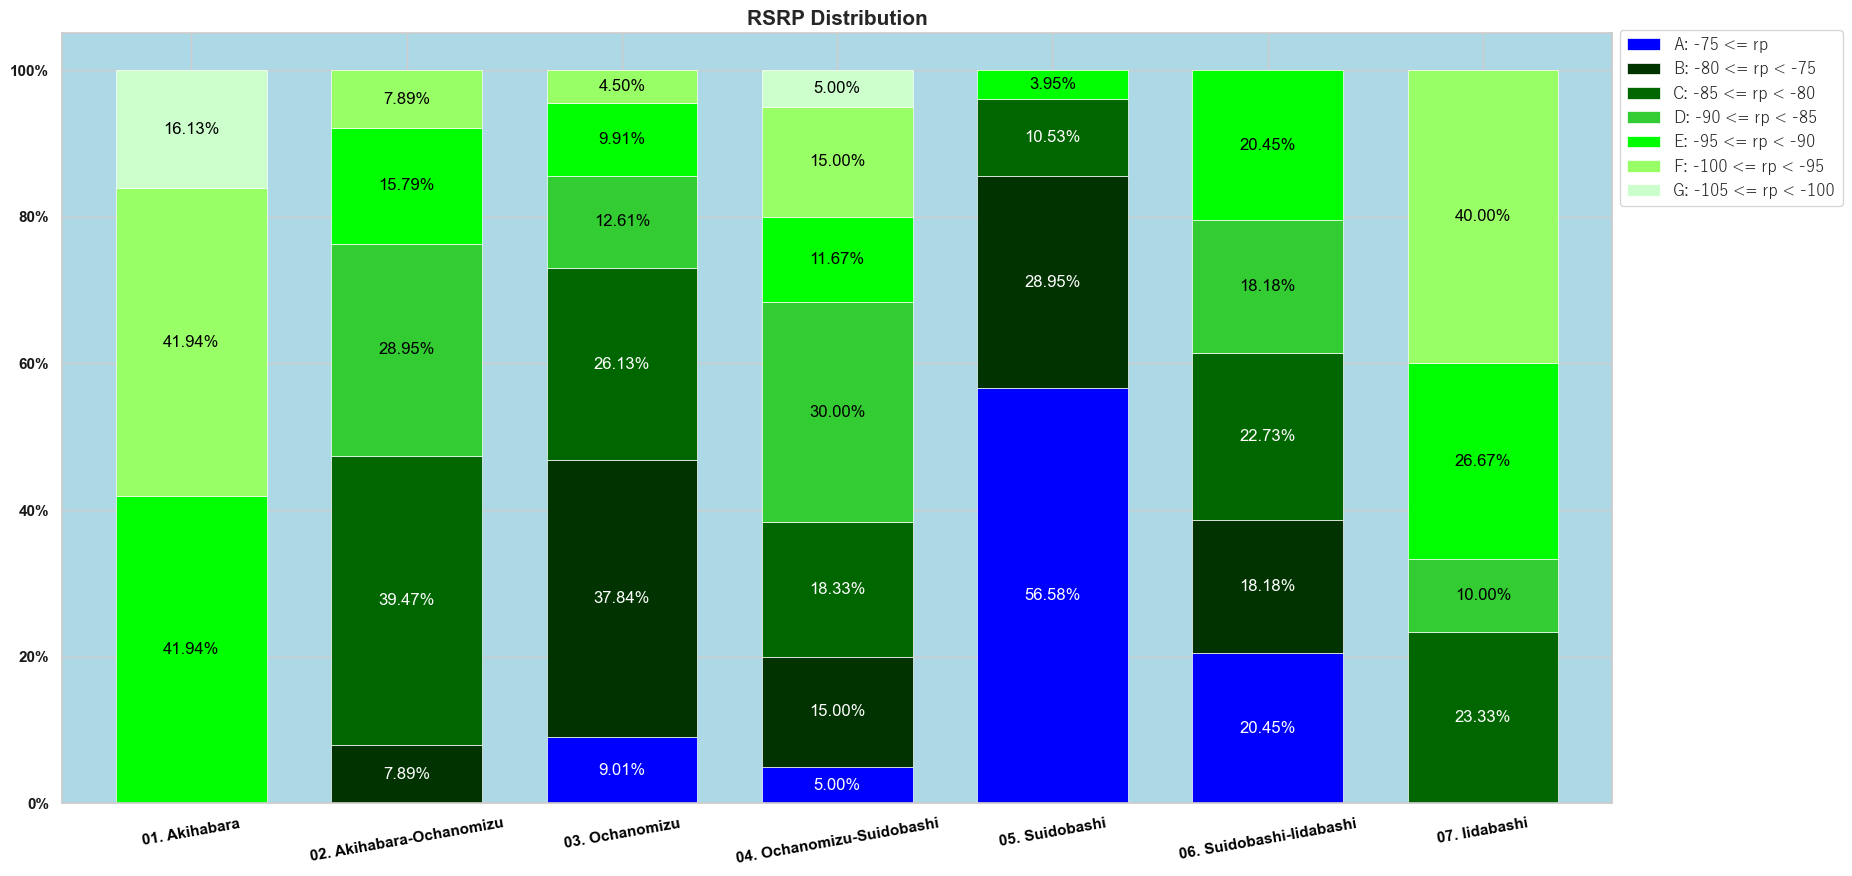

In [25]:
from matplotlib.ticker import FuncFormatter
plt.close()
plt.style.use('default')
sns.set(style='whitegrid', rc={'figure.figsize':(20, 10)})
ax = jr_bar.plot(  
     kind = 'bar', 
     stacked = True, 
     title = '', 
     mark_right = True, 
     color =['#0000FF', '#003300', '#006600', '#33CC33', '#00FF00', '#99FF66', '#CCFFCC'],
     width = 0.7,
     edgecolor = 'white',
     linewidth=0.5 
) 
#'#0000FF', '#003300', '#006600', '#33CC33', '#00FF00', '#99FF66', '#CCFFCC', '#FFFF00', '#FF9900', '#C02000', '#800000', '#000000'
labels = ['01. Akihabara', '02. Akihabara-Ochanomizu', '03. Ochanomizu', 
          '04. Ochanomizu-Suidobashi', '05. Suidobashi', '06. Suidobashi-Iidabashi',
          '07. Iidabashi']

plt.legend(prop={"family":"Yu Gothic","size":12}, bbox_to_anchor=(1.005, 1.004), loc=2, borderaxespad=0.)

# Range -> Total count of jr_bar values
for i in range(49):
    left, bottom, width, height = ax.patches[i].get_bbox().bounds
    if height<1: continue
    if (i < 21):
        ax.annotate("{0:.2f}%".format(height), xy=(left + width / 2, bottom + height / 2), ha='center', va='center',
                    color="white", fontsize=12)
    elif 21 <= i:
        ax.annotate("{0:.2f}%".format(height), xy=(left + width / 2, bottom + height / 2), ha='center', va='center',
                    color="black", fontsize=12)
    
ax.set_facecolor('lightblue')
#plt.xlabel('RSRP Distribution')
ax.set_title('RSRP Distribution', fontsize=15, fontweight='bold')
#ax.axes.xaxis.set_visible(False)
plt.xticks(color='black', weight='bold', rotation=10)
plt.yticks(color='k', weight='bold')
#ax.suptitle('RSRP vs RSRQ', fontsize=20, fontweight='bold')
#ax.text(0.0, -4, 'RSRP', ha='center', va='center', fontsize=13)
#ax.text(0.02, 0.5, 'RSRQ (dB)', ha='center', va='center', rotation='vertical', fontsize=17, fontweight='bold')
ax.set_xticklabels(labels)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0f}%'.format(y)))
plt.show()